## Estadistica Aplicada 

Sesion 8 - 6 septiembre 

Ana Sofia Saucedo Garcia
Grupo 42

In [7]:
# #Librerias basicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [8]:
#Libreria especializada

from lifelines import KaplanMeierFitter


In [9]:
# datos 

relacion =pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [10]:
relacion

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1
5,0,4,1
6,0,4,1
7,0,5,1
8,0,5,1
9,0,8,1


Esta base de datos muestra el tiempo de supervivencia de una relacion en semanas (t) , el evento es que la relacion se termine, la columna estado es la columna de evento/censura.
La muestra es de 42 personas que estan en una relacion 

La variable  tratamiento toma dos variables 1 y 0

In [11]:
relacion.count()

tratamiento    42
t              42
estado         42
dtype: int64

In [12]:
# Estimador Kaplan-Meier de la funcion de supervivencia 
km1= KaplanMeierFitter().fit(relacion['t'],relacion['estado'])

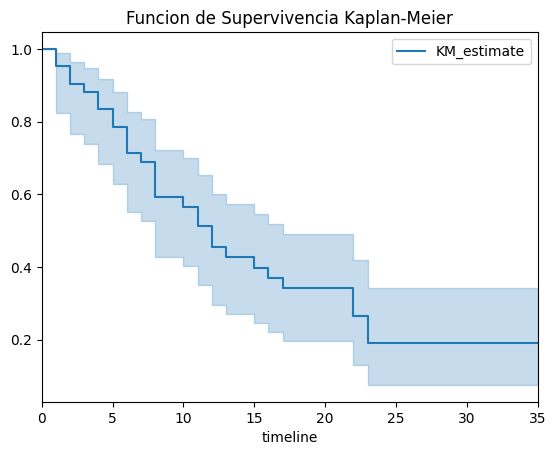

In [13]:
# vamos a ver la grafica de la funcion de supervivencia

km1.plot_survival_function()
plt.title('Funcion de Supervivencia Kaplan-Meier')
plt.xlim(0,35);

In [14]:
# Funcion de supervivencia

km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.952381
2.0,0.904762
3.0,0.880952
4.0,0.833333
5.0,0.785714
6.0,0.714286
7.0,0.689655
8.0,0.591133


In [15]:
# mostrar los valores de IC 
## intervalos de confianza al 95% 
km1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
1.0,0.822743,0.987873
2.0,0.765847,0.963148
3.0,0.737342,0.948639
4.0,0.681928,0.916833
5.0,0.628621,0.882248
6.0,0.552081,0.826483
7.0,0.526178,0.806536
8.0,0.426898,0.722754
9.0,0.426898,0.722754


In [16]:
# mediana de la funcion de supervivencia

km1.median_survival_time_

12.0

La mediana del tiempo de supervivencia es 12 semanas , significa que la mitad de las relaciones han terminado en la semana 12 o la mitad de las relaciones dura mas de 12 semanas 

In [17]:
# separar la base de datos en detallistas y no detallistas 

detallistas = relacion.query('tratamiento==1')
no_deta = relacion.query('tratamiento == 0')

In [18]:
# Funcion Kaplan Meier de los detallistas

km_d = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nd = KaplanMeierFitter().fit(no_deta['t'],no_deta['estado'])

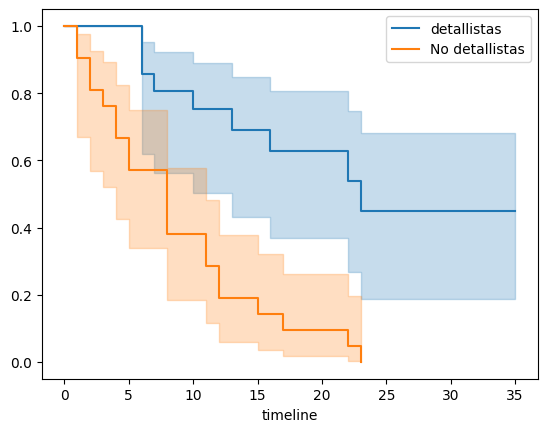

In [19]:
km_d.plot_survival_function(label='detallistas')
km_nd.plot_survival_function(label = 'No detallistas');


Prueba de hipotesis ( Long-rank-test)

$ H_0 : S(1)= S(2)$  

$ H_a : S(1)\neq S(2)$ funciones de supervencias distintas

In [20]:
from lifelines.statistics import logrank_test

In [21]:
LRT = logrank_test(detallistas['t'],no_deta['t'],detallistas['estado'],no_deta['estado'])

In [22]:
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [23]:
LRT.p_value.round(2)

0.0

Como p value< alpha , entonces rechazamos $H_0$ , con un nivel de confianza del 95% , significa que las funciones de supervivencia son distintas , sabemos que la relacion de los detallistas dura mas que la de los no detallistas

In [24]:
km_d.median_survival_time_

23.0